In [35]:
# Scientific libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


# model libraries 
from scipy.stats import chi2_contingency, norm
from scipy.stats import chi2_contingency, ttest_ind
import researchpy as rp
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf


from sklearn.metrics import roc_curve, auc


plt.rc("figure", figsize=(16,8))
plt.rc("font", size=14)
# Pandas options
pd.options.display.max_columns = None

In [121]:
dict_tipos = {
# parte simat
'ANO_INF':              'uint16',
'CODIGO_DANE':          'uint64',
'CODIGO_DANE_SEDE':     'uint64',
'TIPO_DOCUMENTO':       'uint8',
'NRO_DOCUMENTO':        'string',
'DIRECCION_RESIDENCIA': 'string',
'RES_DEPTO':            'uint8',
'RES_MUN':              'uint16',
'ESTRATO':              'uint8',
'SISBEN':               'float16',
'GENERO':               'uint8',
'POB_VICT_CONF':        'uint8',
'PROVIENE_SECTOR_PRIV': 'string',
'PROVIENE_OTR_MUN':     'string',
'TIPO_DISCAPACIDAD':    'uint8',
'CAP_EXC':              'uint8',
'CODIGO_ETNIA':         'uint16',
'CODIGO_JORNADA':       'uint8',
'CARACTER':             'uint8',
'CODIGO_ESPECIALIDAD':  'uint8',
'CODIGO_GRADO':         'int8',
'CODIGO_METODOLOGIA':   'uint8',
'REPITENTE':            'uint8',
'SIT_ACAD_ANIO_ANT':    'uint8',
'CON_ALUM_ANIO_ANT':    'uint8',
'ZONA_RESI_ALU':        'uint8',
'EDAD':                 'uint8',
'NIVEL':                'uint8',
'DIR_NUM_LOCALIDAD':    'uint8',
'NIVEL_SISBEN':         'uint8',
'GRADO_OVERAGE':        'uint8',
'OVERAGE':        'uint8',
# parte sisben
'ficha': 'int64',
'comuna': 'uint8',
'barrio': 'uint32',
'nombarrio': 'string',
'direcc':'string',
'vereda': 'uint8',
'nomvereda':'string',
'vivienda': 'uint8',
'pared': 'uint8',
'piso': 'uint8',
'energia':'uint8',
'alcanta':'uint8',
'gas': 'uint8',
'telefono' : 'uint8',
'basura' : 'uint8',
'acueduc' : 'uint8',
'estrato' : 'uint8',
'elimbasura' : 'uint8',
'tcuartosvi' : 'uint8',
'thogar' : 'uint8',
'recolec' : 'uint8',
'tipdir' : 'uint8',
'verifica' : 'uint8',
'hogar' : 'uint8',
'teneviv' : 'uint8',
'tcuartos' : 'uint8',
'tdormir' : 'uint8',
'sanitar' : 'uint8',
'usanitar' : 'uint8',
'usosani' : 'uint8',
'tsanitar' : 'uint8',
'ducha' : 'uint8',
'agua' : 'uint8',
'llega' : 'uint8',
'cuandi' : 'uint8',
'suminis' : 'uint8',
'cuanhoras' : 'uint8',
'preparan' : 'uint8',
'cocina' : 'uint8',
'cocinan' : 'uint8',
'alumbra' : 'uint8',
'usotele' : 'uint8',
'nevera' : 'uint8',
'lavadora' : 'uint8',
'tvcolor' : 'uint8',
'tvcable' : 'uint8',
'calenta' : 'uint8',
'horno' : 'uint8',
'aire' : 'uint8',
'computador' : 'uint8',
'equipo' : 'uint8',
'moto' : 'uint8',
'tractor' : 'uint8',
'tiene_auto' : 'uint8',
'bieraices': 'uint8',
'tpersona' : 'uint8',
'informan' : 'uint8',
'orden' : 'uint8',
'nucleo' : 'uint8',
'parentes' : 'uint8',
'tipodoc' : 'uint8',
'documen':'string',
'sexo' : 'uint8',
'estcivil' : 'uint8',
'discapa' : 'uint8',
'carnet' : 'uint8',
'asiste' : 'uint8',
'tipoesta' : 'uint8',
'grado' : 'uint8',
'nivel' : 'uint8',
'activi' : 'uint8',
'buscando' : 'uint8',
'ingresos': 'int64',
'edad':'uint8',
'conyuvive': 'uint8',
'hijosde':'int8',
'embaraza' : 'uint8',
'extranjero' : 'uint8',
'pagapor' : 'uint8',
'percibe' : 'uint8',
'serdomes' : 'uint8',
'unigasto' : 'uint8',
'area' : 'uint8',
'nparentes':'uint8',
'puntaje_sisben_3':'float32',
'todos_servicios_Pub':'uint8',
'indice_hacinamiento': 'float16',
# parte c-600  
'ES_BILIGUE': 'int8',
'TOTAL_DOCENTES': 'uint16',
'TOTAL_ALUMNOS': 'uint16',
'TOTAL_EQUIPO_COMPUTO': 'uint16',
'TOTAL_DOCENTES_CON_TITULO':'uint8',
# parte ICFES
'num_presentaron_ICFES': 'uint8'
  }




In [29]:
df = pd.read_csv('data/3-oro/Merge_2020_ICFES_C600.csv' , index_col=0, dtype = dict_tipos)

In [30]:
df.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 457047 entries, 0 to 457046
Columns: 130 entries, ANO_INF to num_presentaron_ICFES
dtypes: float16(2), float32(1), float64(4), int64(3), int8(2), object(2), string(8), uint16(6), uint32(1), uint64(2), uint8(99)
memory usage: 124.2+ MB


In [32]:
df.head(1)

,ANO_INF,CODIGO_DANE,CODIGO_DANE_SEDE,TIPO_DOCUMENTO,NRO_DOCUMENTO,DIRECCION_RESIDENCIA,RES_DEPTO,RES_MUN,ESTRATO,SISBEN,FECHA_NACIMIENTO,GENERO,POB_VICT_CONF,PROVIENE_SECTOR_PRIV,PROVIENE_OTR_MUN,TIPO_DISCAPACIDAD,CAP_EXC,CODIGO_ETNIA,CODIGO_JORNADA,CARACTER,CODIGO_ESPECIALIDAD,CODIGO_GRADO,CODIGO_METODOLOGIA,REPITENTE,SIT_ACAD_ANIO_ANT,CON_ALUM_ANIO_ANT,ZONA_RESI_ALU,EDAD,NIVEL,DIR_NUM_LOCALIDAD,NIVEL_SISBEN,GRADO_OVERAGE,OVERAGE,ficha,comuna,barrio,nombarrio,direcc,vereda,nomvereda,vivienda,pared,piso,energia,alcanta,gas,telefono,basura,acueduc,estrato,elimbasura,tcuartosvi,thogar,recolec,tipdir,verifica,hogar,teneviv,tcuartos,tdormir,sanitar,usanitar,usosani,tsanitar,ducha,agua,llega,cuandi,suminis,cuanhoras,preparan,cocina,cocinan,alumbra,usotele,nevera,lavadora,tvcolor,tvcable,calenta,horno,aire,computador,equipo,moto,tractor,tiene_auto,bieraices,tpersona,informan,orden,nucleo,parentes,tipodoc,sexo,estcivil,discapa,carnet,asiste,tipoesta,grado,nivel,activi,buscando,ingresos,edad,conyuvive,hijosde,embaraza,extranjero,pagapor,percibe,serdomes,unigasto,area,nparentes,puntaje_sisben_3,nivel_hacinamiento,todos_servicios_Pub,indice_hacinamiento,ES_BILINGUE,TOTAL_DOCENTES,TOTAL_ALUMNOS,TOTAL_EQUIPO_COMPUTO,ALUMN_POR_DOCENTE,COMPU_POR_ALUMN,TOTAL_DOCENTES_CON_TITULO,PROP_DOCENTES_CON_TITULO,promepuntaje,num_presentaron_ICFES
0,2020,111001000078,111001000078,2,1000004716,CL 29 A SUR # 50 - 41 PL 2,11,1,3,29.0,2003-04-14,0,99,0,0,0,9,0,6,1,5,10,1,0,1,9,1,16,4,16,1,100,0,4304159,16,4407,ALCALA,CL 33 SUR 51 A 47 PI 1 CU 1,0,BARRIO ZONA URBANA,2,1,2,1,1,1,2,1,1,3,1,2,1,3,1,1,1,1,2,2,1,1,2,1,1,1,1,0,1,0,1,2,2,1,0,1,1,1,2,2,2,2,0,2,0,0,0,1,5,2,4,1,3,2,0,5,0,0,1,4,3,1,3,0,0,8,0,0,0,0,0,0,0,1,1,3,29.440001,Hacinamiento_medio,1,2.5,0,27,627,231,23.222222,0.368421,24,0.888889,262.909091,33


## Variables de consideracion inicial

In [86]:
variables = ['EDAD',
             'GRADO_OVERAGE', #-> solo si no se incluye OVERAGE en Categoricas
             'estrato',
             'puntaje_sisben_3',
             'indice_hacinamiento', #-> solo si no se pone nivel_hacinamiento en Categorias
             'ingresos',
             #'TOTAL_DOCENTES',
             #'TOTAL_ALUMNOS',
             'TOTAL_EQUIPO_COMPUTO',
             'ALUMN_POR_DOCENTE',
             'COMPU_POR_ALUMN',
             'TOTAL_DOCENTES_CON_TITULO',
             'PROP_DOCENTES_CON_TITULO', #-> solo si no se incluye TOTAL_DOCENTES_CON_TITULO y TOTAL_ALUM al tiempo
             'promepuntaje',
             'num_presentaron_ICFES'
            ]


categorias= ['GENERO',
             'POB_VICT_CONF',
             'PROVIENE_SECTOR_PRIV',
             'PROVIENE_OTR_MUN',
             'TIPO_DISCAPACIDAD',
             'CAP_EXC',
             'CODIGO_ETNIA',
             'CODIGO_JORNADA',
             'CARACTER',
             'NIVEL',
             # 'CODIGO_GRADO',#no se incluye pues se filtra por este valor
             # 'CODIGO_METODOLOGIA', #No se inclye porque se filtra por este valor
            'SIT_ACAD_ANIO_ANT',
             'CON_ALUM_ANIO_ANT',
             'ZONA_RESI_ALU',
             'DIR_NUM_LOCALIDAD',
             #'OVERAGE', # si no se incluye GRADO_OVERAGE
             'vivienda',
             'embaraza',
             'nparentes',
             'todos_servicios_Pub',
             'teneviv',
             'computador',
             'tiene_auto',
             'ES_BILINGUE',
             #'nivel_hacinamiento',
             #'OVERAGE',

             ]

# Análisis y selección de Caracteríticas para los Modelos
Empezamos con un modelo que filtra por grado escolar y que cumpla con Metodología =1, es decir educacion tradicional. Después corremos ese mismo modelo, pero ahora eliminando algunos outliers de edad bajo el criterio de 3 desviaciones estándar con respecto a la media.

### Basic EDA

<AxesSubplot:xlabel='REPITENTE', ylabel='promepuntaje'>

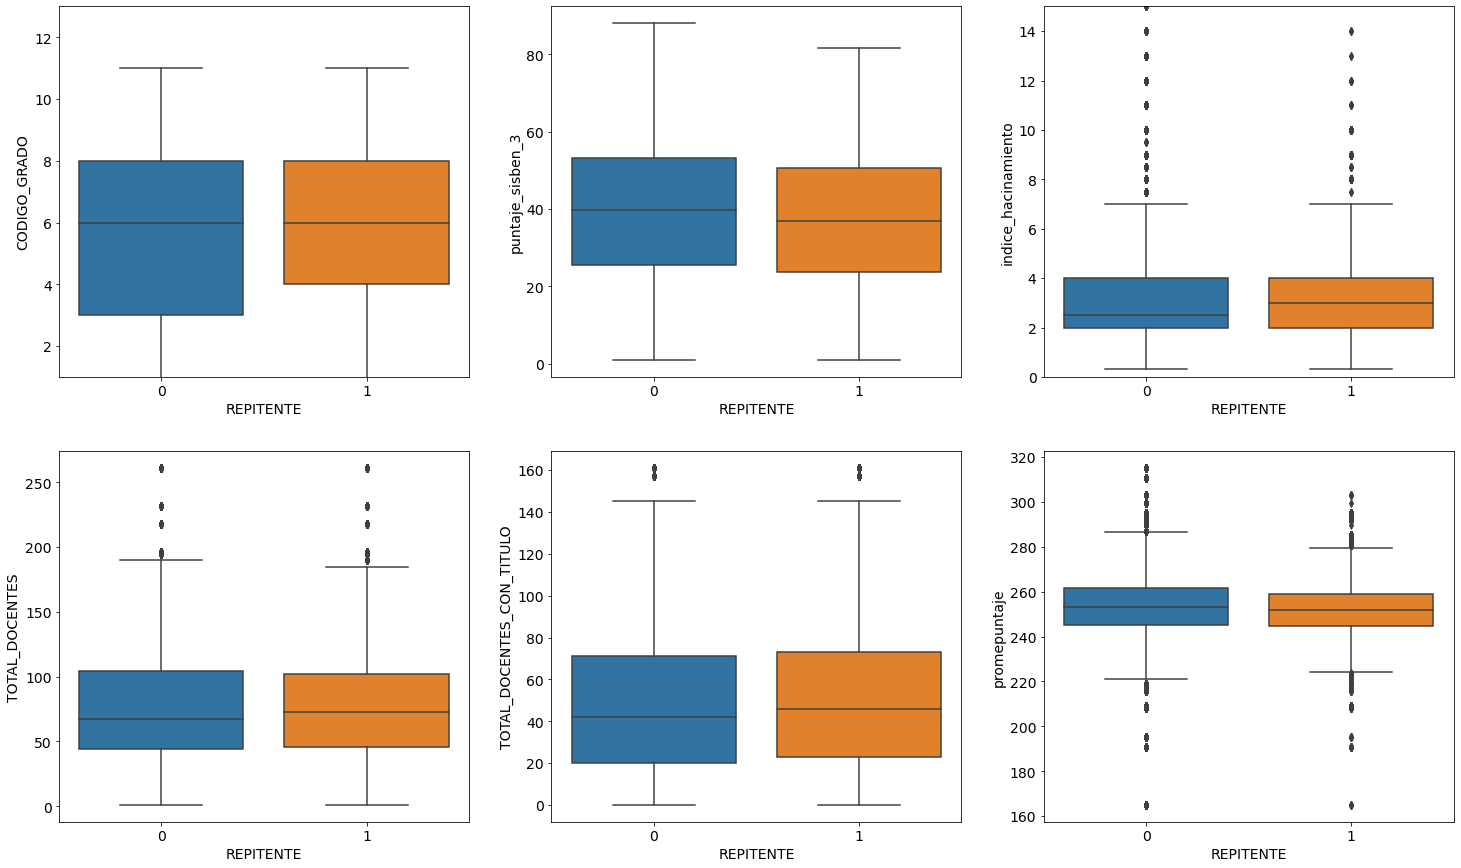

In [56]:
fig, ax=plt.subplots(2,3, figsize=(25,15))
sns.boxplot(y='CODIGO_GRADO', x='REPITENTE', data=df, ax=ax[0][0]).set(ylim = (1,13))
sns.boxplot(y= 'puntaje_sisben_3', x ='REPITENTE', data = df, ax=ax[0][1])
sns.boxplot(y= 'indice_hacinamiento', x='REPITENTE', data=df, ax=ax[0][2]).set(ylim = (0,15))
sns.boxplot(y = 'TOTAL_DOCENTES', x= 'REPITENTE', data = df, ax=ax[1][0])
sns.boxplot(y = 'TOTAL_DOCENTES_CON_TITULO', x= 'REPITENTE', data = df, ax=ax[1][1])
sns.boxplot(y = 'promepuntaje', x= 'REPITENTE', data = df, ax=ax[1][2])

## Scaterplos variables continuas, otras graficas ya hechas...

<AxesSubplot:ylabel='None'>

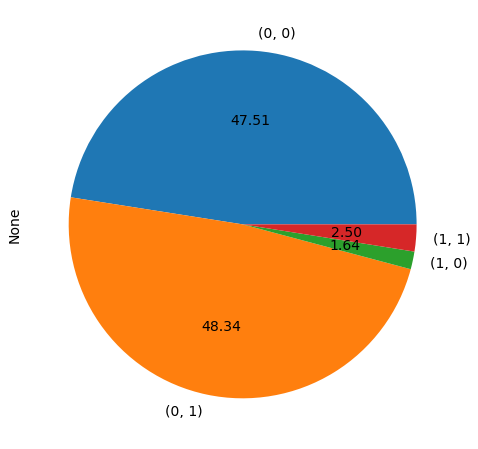

In [61]:
df.groupby(['REPITENTE', 'GENERO']).size().plot(kind='pie', autopct='%.2f')

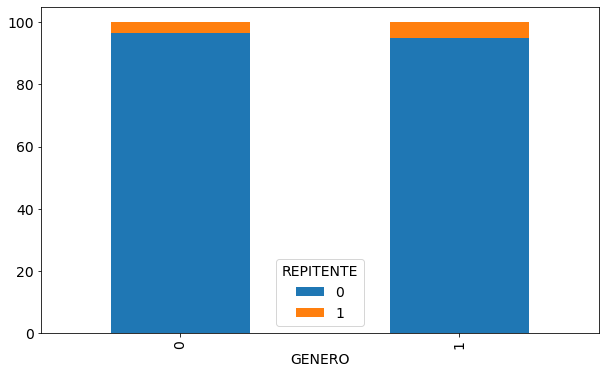

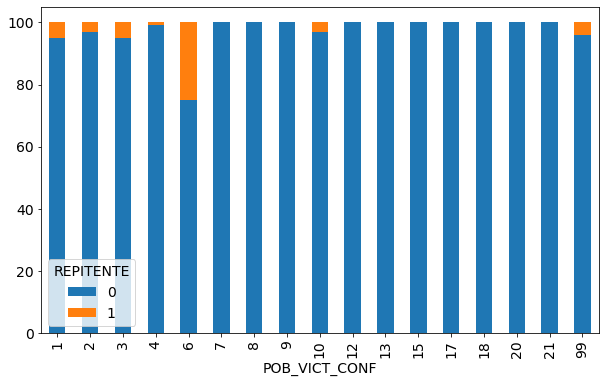

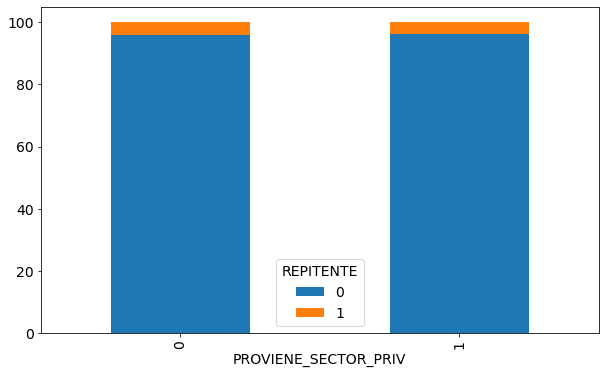

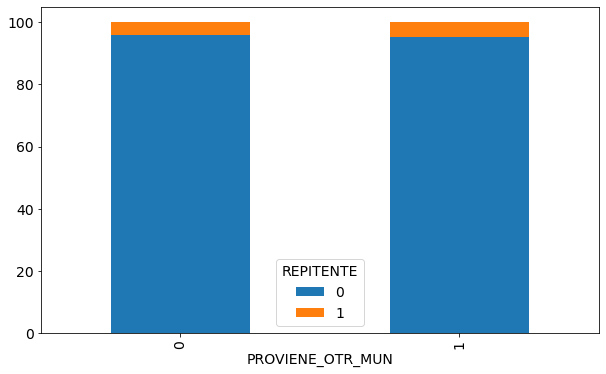

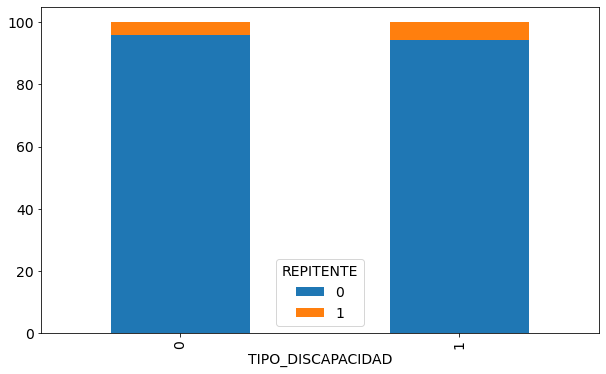

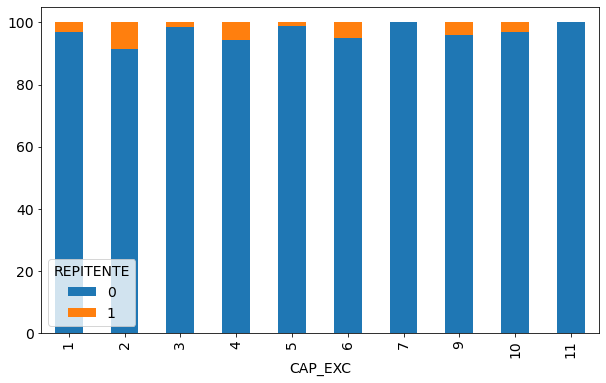

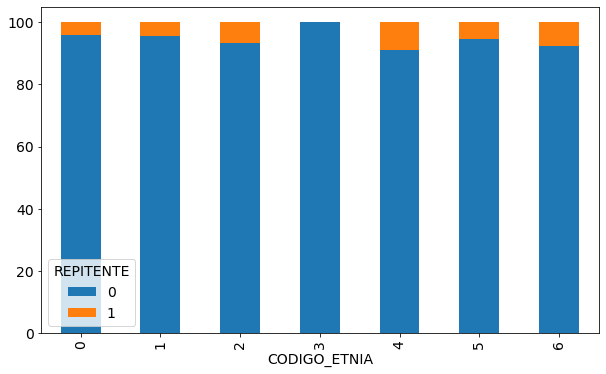

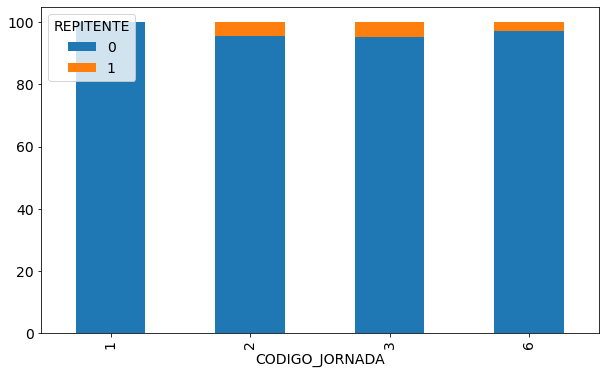

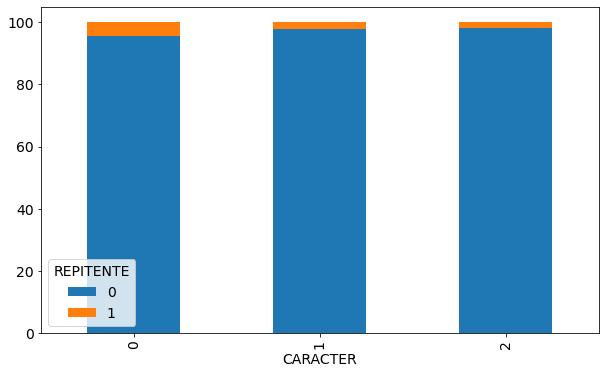

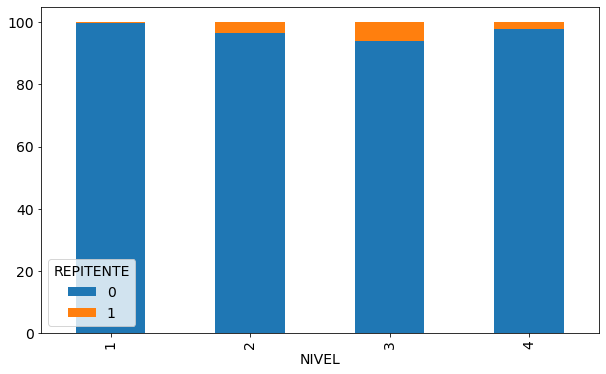

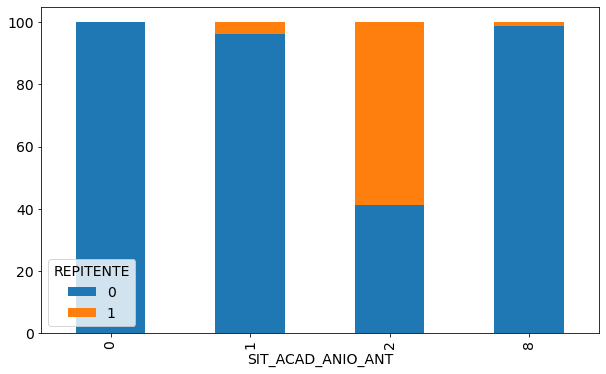

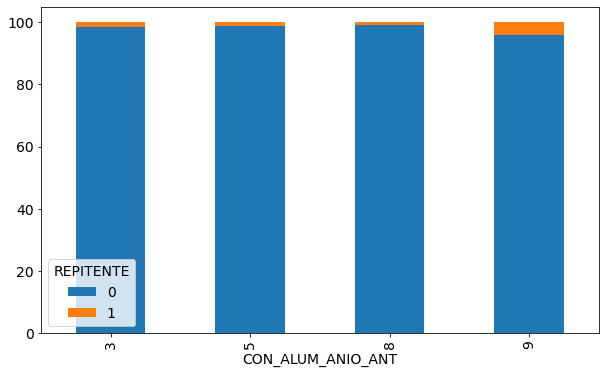

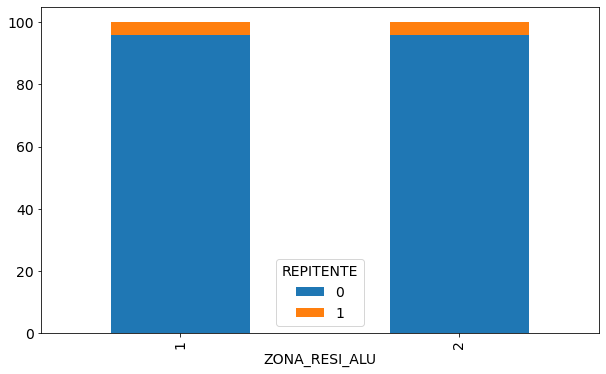

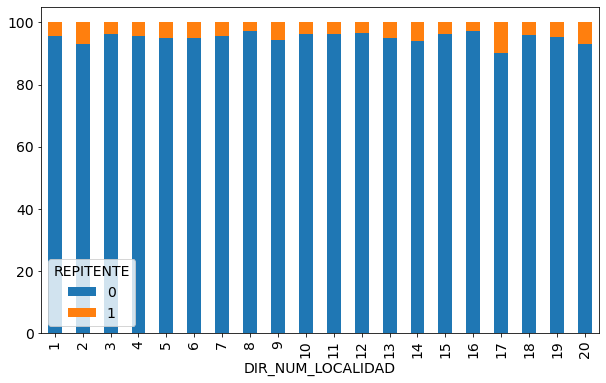

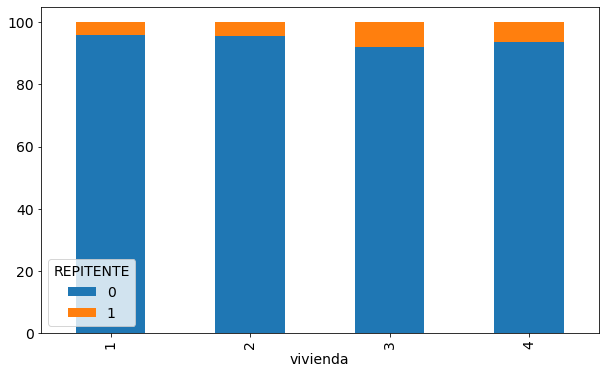

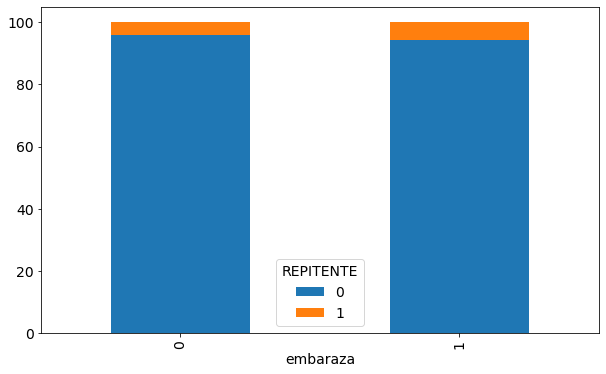

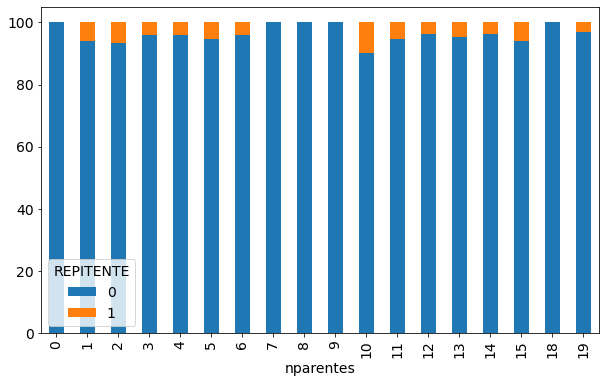

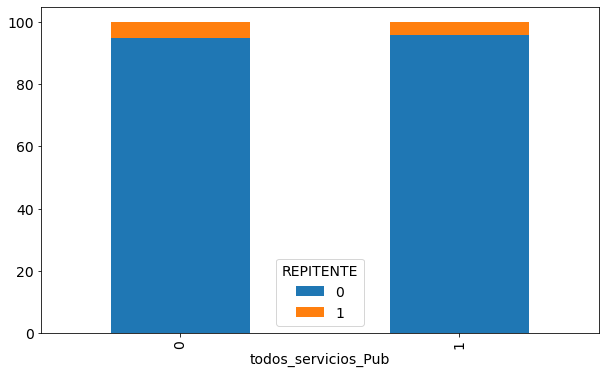

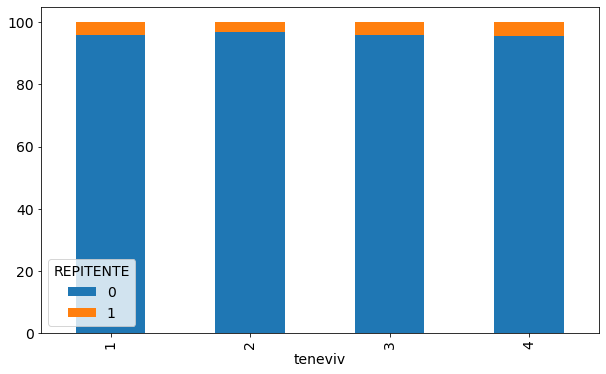

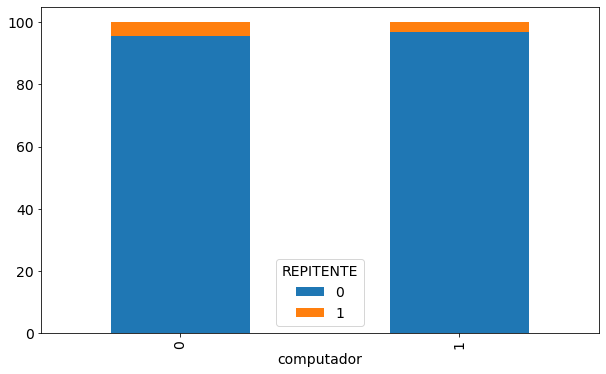

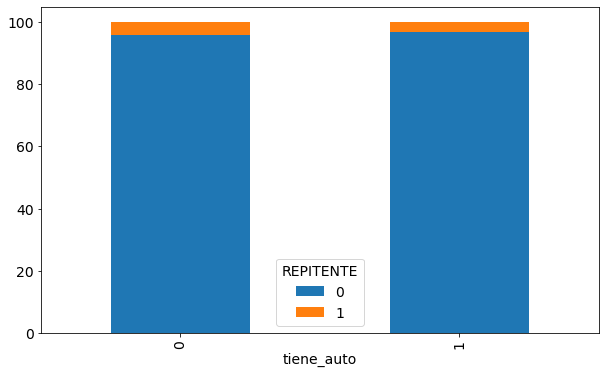

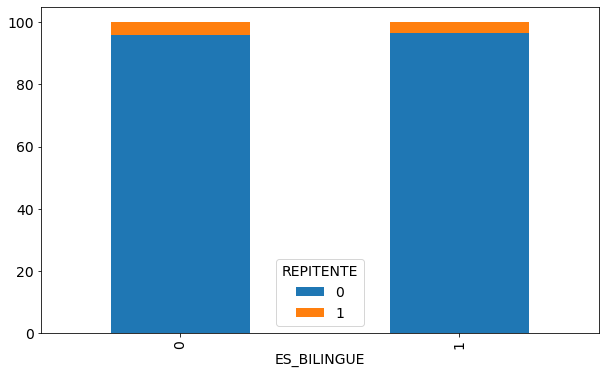

In [74]:
for col in categorias:
    gra = pd.crosstab(df[col], df["REPITENTE"], normalize = "index")*100
    ax = gra.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.show()
    
    

## Distribucion diferente a lo largo de los grados ?

### Parece que hay poca evidencia para decir que las distribuciones son diferentes. Más bien son similares.

In [45]:
a=df[df['REPITENTE']==1]['CODIGO_GRADO']
b=df[df['REPITENTE']==0]['CODIGO_GRADO']
T,p=ttest_ind(a,b)
p

4.2534366880537003e-07

### Bastante evidencia de que las distribuciones son diferentes, lo cual tiene sentido. Un argumento a favor de filtrar así

In [71]:
a1=df[df['REPITENTE']==1]['CODIGO_METODOLOGIA']
b1=df[df['REPITENTE']==0]['CODIGO_METODOLOGIA']
T,p=ttest_ind(a1,b1)
p

0.20268264279821704

## Filtro por Codigo Grado y Metodologia

In [113]:
df = df[(df['CODIGO_GRADO']== 8)]

In [114]:
df = df[(df['CODIGO_METODOLOGIA']==1)]

# Seleccion Variables modelo basada en Estadística

## Pruebas chi de independencia
### Parte I: Pruebas Chi de dependencia con las variables categoricas

In [75]:
cat_dep = []
for i in categorias:
    crosstab = pd.crosstab(df['REPITENTE'], df[i])
    chi2, p, dof, ex = stats.chi2_contingency(crosstab)
    if p <= 0.01:
        print( 'p-value:' , p  , 'Categoria:', i )
        cat_dep.append(i)
    

p-value: 6.653510293236442e-158 Categoria: GENERO
p-value: 3.793819304766079e-05 Categoria: POB_VICT_CONF
p-value: 0.003560876304117598 Categoria: PROVIENE_SECTOR_PRIV
p-value: 1.9066956272878775e-19 Categoria: TIPO_DISCAPACIDAD
p-value: 0.00016468525233731912 Categoria: CODIGO_ETNIA
p-value: 5.057363961503753e-102 Categoria: CODIGO_JORNADA
p-value: 3.330671274116055e-146 Categoria: CARACTER
p-value: 0.0 Categoria: NIVEL
p-value: 0.0 Categoria: SIT_ACAD_ANIO_ANT
p-value: 1.4487928394915344e-43 Categoria: CON_ALUM_ANIO_ANT
p-value: 8.094537357136387e-176 Categoria: DIR_NUM_LOCALIDAD
p-value: 1.8250777101663176e-16 Categoria: vivienda
p-value: 3.0359892362030986e-33 Categoria: todos_servicios_Pub
p-value: 7.999961411704358e-19 Categoria: teneviv
p-value: 1.735284863240051e-39 Categoria: computador
p-value: 4.673166430496182e-07 Categoria: tiene_auto
p-value: 2.8185143393681144e-05 Categoria: ES_BILINGUE


In [76]:
set(categorias) - set(cat_dep)

{'CAP_EXC', 'PROVIENE_OTR_MUN', 'ZONA_RESI_ALU', 'embaraza', 'nparentes'}

De acuerdo a lo anterior, las variables CAP_EXC, PROVIENE_OTR_MUN y ZONA_RESI_ALU, embaraza, nparentes están poco relacionadas con REPITENTE
Por otro lado, OVERAGE, NIVEL y SIT_ACAD_ANIO_ANT son las más relacionadas. También es un problema si son totalmente explicativas (cuasi-separación).

### Parte II: Pruebas Chi ENTRE las variables que salieron en parte I para evaluar INDEPENDENCIA

In [77]:
len(set(cat_dep))

17

In [80]:
for i in cat_dep:
    for j in cat_dep:
        if i <= j:
            crosstab = pd.crosstab(df[j], df[i])
            chi2, p, dof, ex = stats.chi2_contingency(crosstab)
            if p > 0.01:
                print( 'Par independientes:' , i  ,' --- ',j ) 
                
#         else:
#             print('Ensayo ')

Par independientes: GENERO  ---  POB_VICT_CONF
Par independientes: GENERO  ---  PROVIENE_SECTOR_PRIV
Par independientes: GENERO  ---  vivienda
Par independientes: GENERO  ---  todos_servicios_Pub
Par independientes: GENERO  ---  teneviv
Par independientes: GENERO  ---  computador
Par independientes: GENERO  ---  tiene_auto
Par independientes: POB_VICT_CONF  ---  TIPO_DISCAPACIDAD
Par independientes: POB_VICT_CONF  ---  vivienda
Par independientes: PROVIENE_SECTOR_PRIV  ---  teneviv
Par independientes: TIPO_DISCAPACIDAD  ---  tiene_auto
Par independientes: CODIGO_ETNIA  ---  GENERO
Par independientes: CODIGO_ETNIA  ---  TIPO_DISCAPACIDAD
Par independientes: CODIGO_JORNADA  ---  vivienda
Par independientes: CON_ALUM_ANIO_ANT  ---  TIPO_DISCAPACIDAD
Par independientes: ES_BILINGUE  ---  GENERO
Par independientes: ES_BILINGUE  ---  POB_VICT_CONF
Par independientes: ES_BILINGUE  ---  PROVIENE_SECTOR_PRIV


 Lo anterior sugiere que hay pocas combinaciones de variables independientes. Parece que todas salen de la misma distribucion

In [90]:
categorias

['GENERO',
 'POB_VICT_CONF',
 'PROVIENE_SECTOR_PRIV',
 'PROVIENE_OTR_MUN',
 'TIPO_DISCAPACIDAD',
 'CAP_EXC',
 'CODIGO_ETNIA',
 'CODIGO_JORNADA',
 'CARACTER',
 'NIVEL',
 'SIT_ACAD_ANIO_ANT',
 'CON_ALUM_ANIO_ANT',
 'ZONA_RESI_ALU',
 'DIR_NUM_LOCALIDAD',
 'vivienda',
 'embaraza',
 'nparentes',
 'todos_servicios_Pub',
 'teneviv',
 'computador',
 'tiene_auto',
 'ES_BILINGUE']

In [91]:
categorias = list(set(categorias) - set(['PROVIENE_SECTOR_PRIV', 'PROVIENE_OTR_MUN', 'computador','CAP_EXC', 'CARACTER', 'NIVEL',
                                         'SIT_ACAD_ANIO_ANT', 'CON_ALUM_ANIO_ANT', 'ZONA_RESI_ALU' ]))

## Ouliters


## Pruebas independecia de las variables continuas

In [81]:
variables


['EDAD',
 'GRADO_OVERAGE',
 'estrato',
 'puntaje_sisben_3',
 'indice_hacinamiento',
 'ingresos',
 'TOTAL_DOCENTES',
 'TOTAL_ALUMNOS',
 'TOTAL_EQUIPO_COMPUTO',
 'ALUMN_POR_DOCENTE',
 'COMPU_POR_ALUMN',
 'TOTAL_DOCENTES_CON_TITULO',
 'promepuntaje',
 'num_presentaron_ICFES']

<ipython-input-84-5d64253ecffd>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df[variables].corr(), dtype=np.bool))


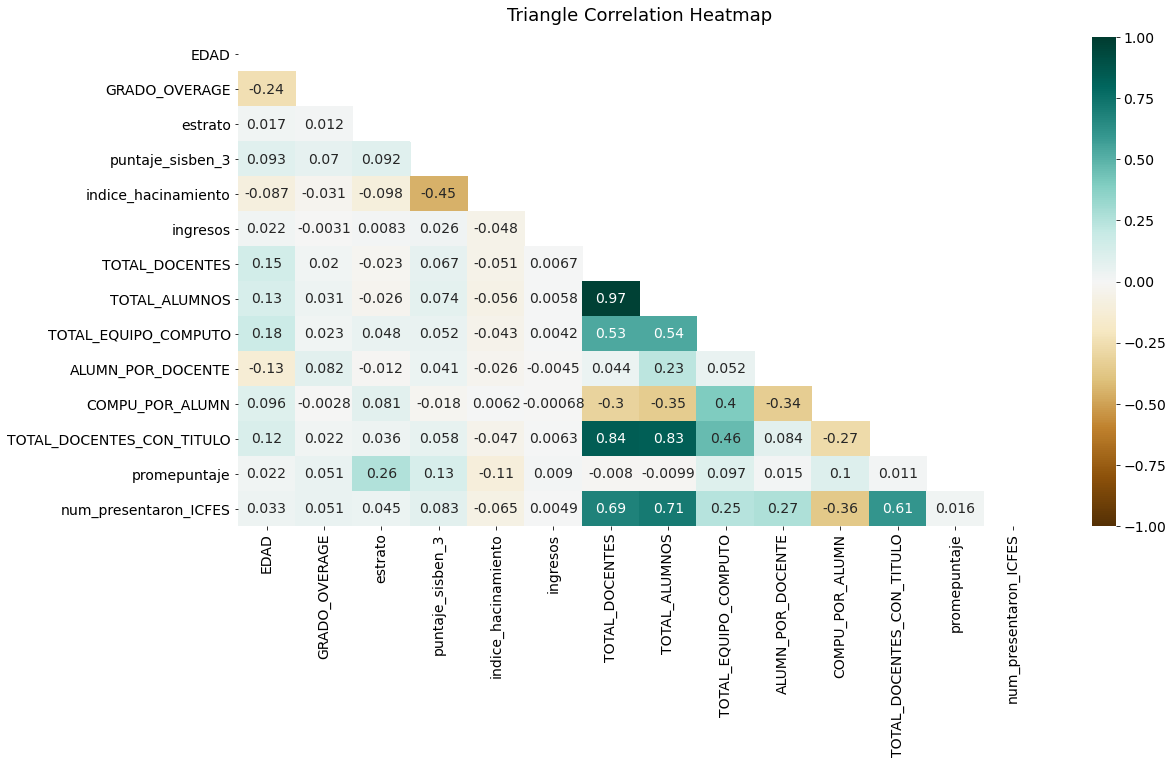

In [84]:
plt.figure(figsize=(18, 9))
# define the mask to set the values in the upper triangle to True

mask = np.triu(np.ones_like(df[variables].corr(), dtype=np.bool))
heatmap = sns.heatmap(df[variables].corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

Hay evidencia fuerte para decir que no se pueden incluir en el mismo modelo

TOTAL_DOCENTES y TOTAL_ALUMNOS
TOTAL_DOCENTES y TOTAL_DOCENTES CON TITULO
TOTAL_DOCENTES CON TITULO Y TOTAL ALUMNOS

Parece que dicen la misma información 

TOTAL ALUMNOS Y num_presentaron ICFES tambien tienen alta correlacion, asi que no se deben poner juntas


A favor: NO USAR TOTAL DOCENTES, TOTAL ALUMNOS

USAR: TOTAL DOCENTES CON TITULO y num_presentaron_ICFES

In [88]:
variables = list(set(variables) - set(['TOTAL_ALUMNOS', 'TOTAL_DOCENTES']))

In [89]:
variables

['puntaje_sisben_3',
 'promepuntaje',
 'estrato',
 'GRADO_OVERAGE',
 'EDAD',
 'ALUMN_POR_DOCENTE',
 'num_presentaron_ICFES',
 'COMPU_POR_ALUMN',
 'ingresos',
 'TOTAL_EQUIPO_COMPUTO',
 'indice_hacinamiento',
 'TOTAL_DOCENTES_CON_TITULO']

# MODELOS

### Assumptions for logistic regression models:

* Independence of observations
* Cannot be a repeated measures design, i.e. collecting outcomes at two different time points.(directly related to one)
* Independent variables are linearly related to the log odds, continuas
* Absence of multicollinearity
* Lack of outliers

## Logistico

### Para las variables continuas podemos suponer que las hipotesis uno y dos se cumplen. Veamos la 3.

In [94]:
df_reducido_continuas= df[variables][df['CODIGO_GRADO'] == 8]

In [99]:
df_reducido_continuas['REPITENTE'] = df['REPITENTE'][df['CODIGO_GRADO'] == 8]

Text(0.5, 1.0, 'puntaje_sisben_3 Log Odds Linear Plot')

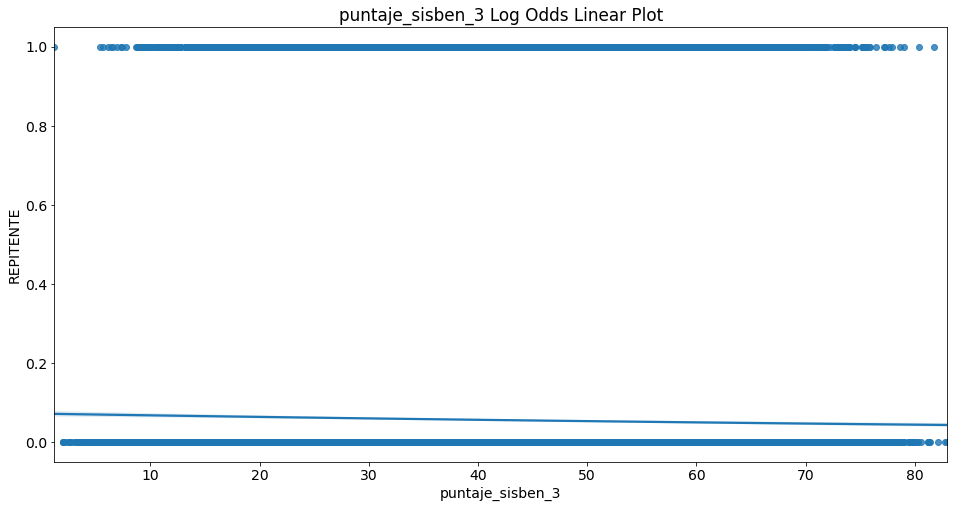

In [100]:
sns.regplot(x= variables[0], y= 'REPITENTE', data= df_reducido_continuas, logistic= True).set_title(f"{variables[0]} Log Odds Linear Plot")

Text(0.5, 1.0, 'promepuntaje Log Odds Linear Plot')

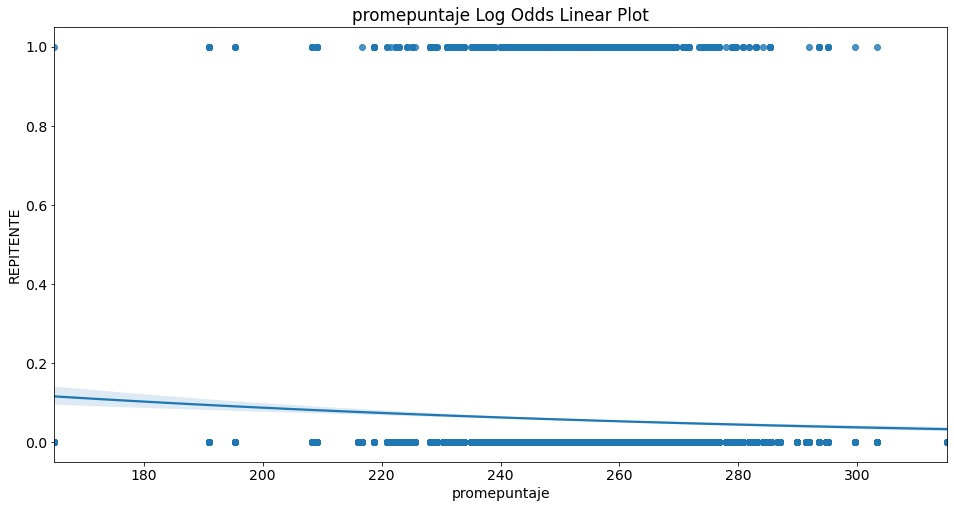

In [101]:
sns.regplot(x= variables[1], y= 'REPITENTE', data= df_reducido_continuas, logistic= True).set_title(f"{variables[1]} Log Odds Linear Plot")


Text(0.5, 1.0, 'estrato Log Odds Linear Plot')

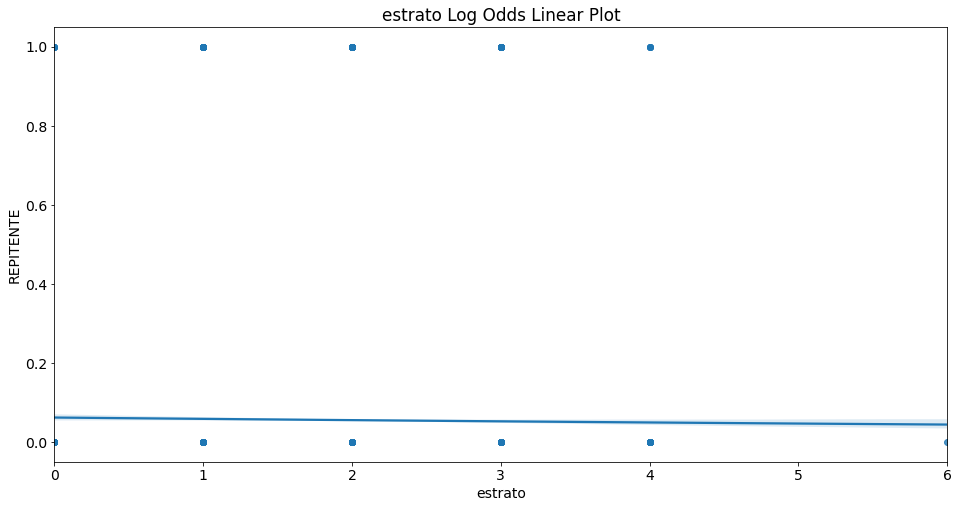

In [102]:
sns.regplot(x= variables[2], y= 'REPITENTE', data= df_reducido_continuas, logistic= True).set_title(f"{variables[2]} Log Odds Linear Plot")

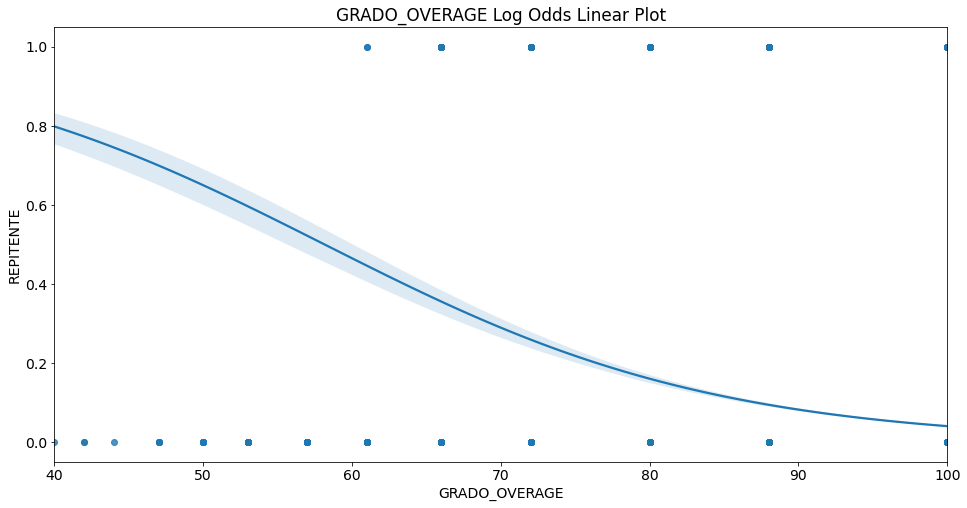

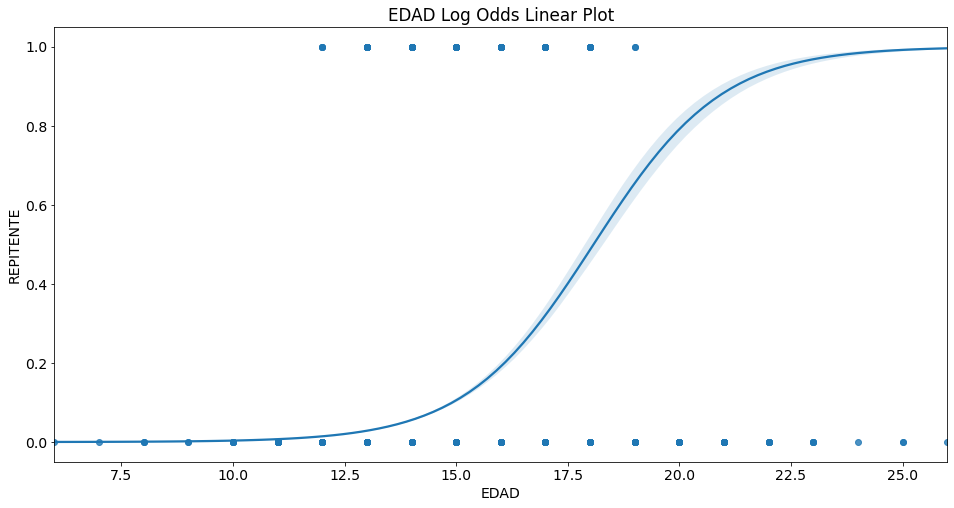

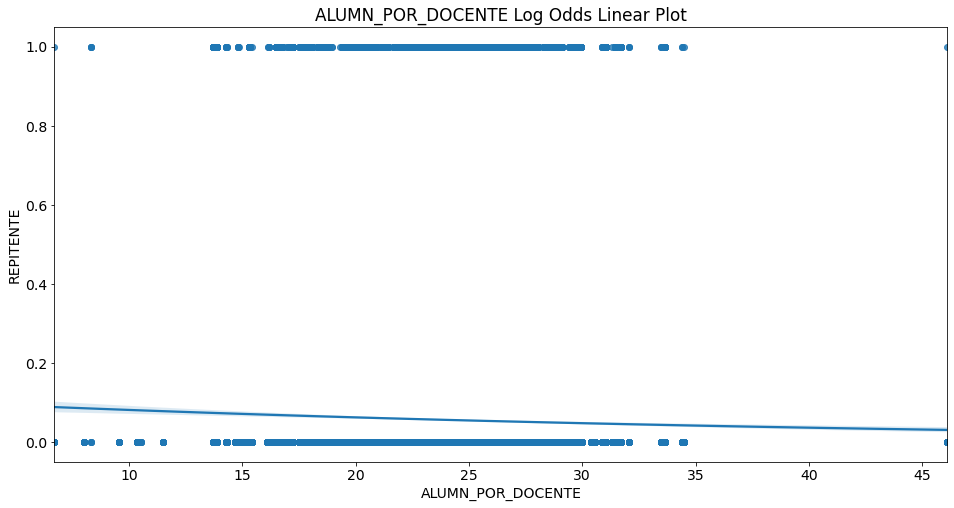

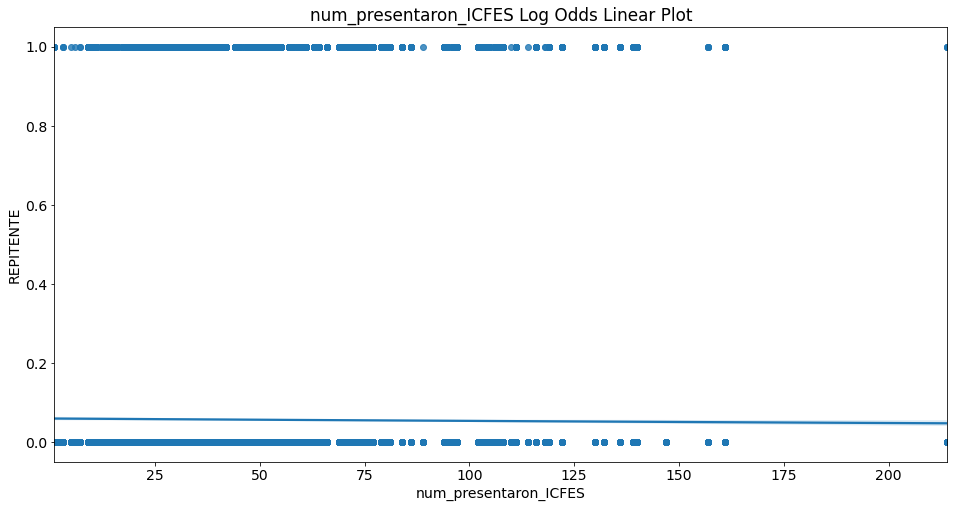

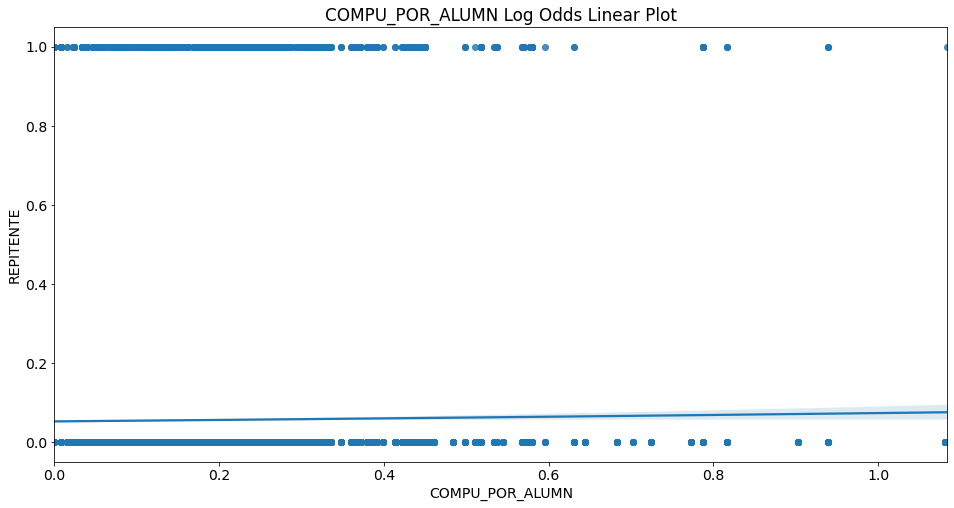

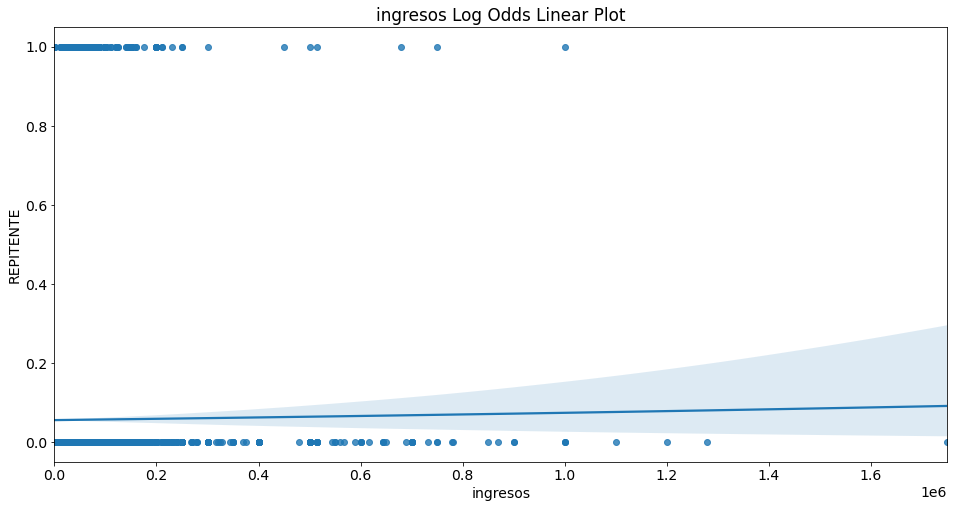

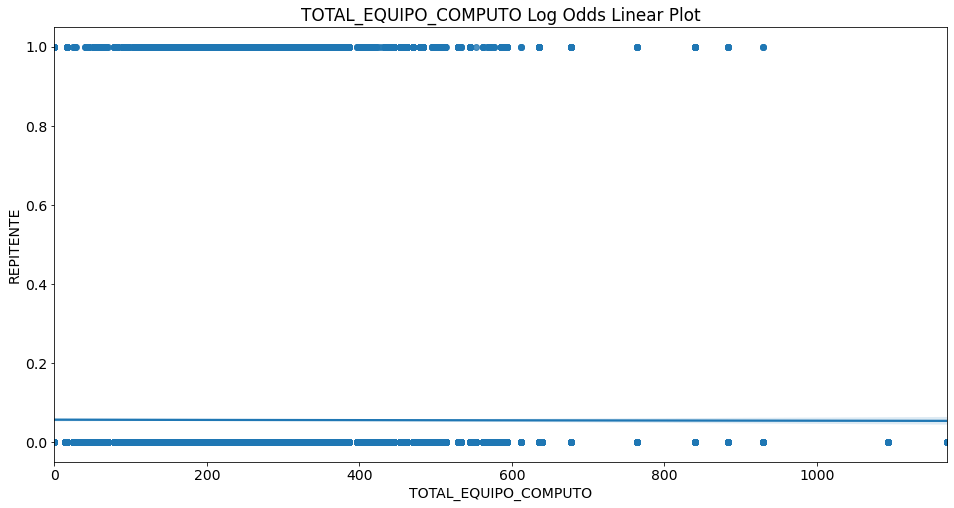

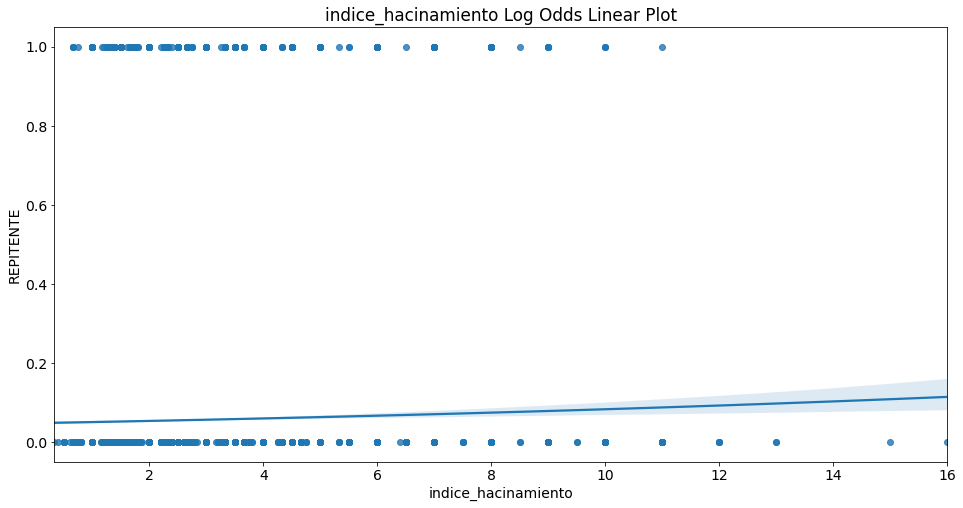

In [104]:
for i in range(3,11):
    sns.regplot(x= variables[i], y= 'REPITENTE', data= df_reducido_continuas, logistic= True).set_title(f"{variables[i]} Log Odds Linear Plot")
    plt.show()

Text(0.5, 1.0, 'TOTAL_DOCENTES_CON_TITULO Log Odds Linear Plot')

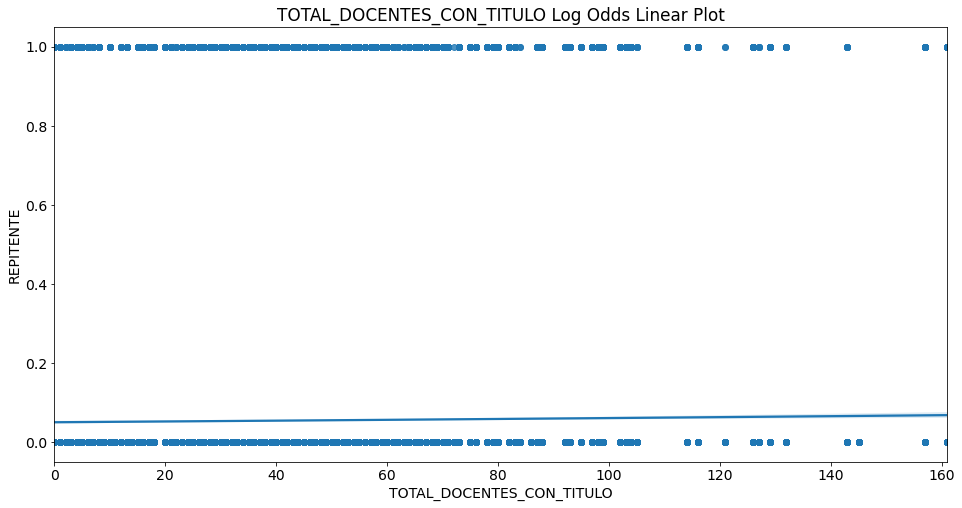

In [106]:
sns.regplot(x= variables[11], y= 'REPITENTE', data= df_reducido_continuas, logistic= True).set_title(f"{variables[11]} Log Odds Linear Plot")

Por lo que se ve, solo sabemos completamente que GRADO_OVERAGE y EDAD. Quizás puntaje_sisben_3 y ALUM_POR_DOCENTE, estrato, TOTAL_DOCENTES CON TITULO


In [107]:
variables

['puntaje_sisben_3',
 'promepuntaje',
 'estrato',
 'GRADO_OVERAGE',
 'EDAD',
 'ALUMN_POR_DOCENTE',
 'num_presentaron_ICFES',
 'COMPU_POR_ALUMN',
 'ingresos',
 'TOTAL_EQUIPO_COMPUTO',
 'indice_hacinamiento',
 'TOTAL_DOCENTES_CON_TITULO']

In [108]:
variables = list(set(variables) - set([ 'promepuntaje', 'num_presentaron_ICFES', 'COMPU_POR_ALUMN', 'ingresos' ,
                                       'TOTAL_EQUIPO_COMPUTO','indice_hacinamiento' ]  ))

## Modelo Logitstico

### Creacion formula

In [109]:
def formula_maker(dependiente, variables, categorias):
    formula = f'{dependiente} ~ '
    for variable in variables:
        if formula != f'{dependiente} ~ ':
            formula += ' + '
        formula += f'{variable}'
    for categoria in categorias:
        if formula != f'{dependiente} ~ ':
            formula += ' + '
        formula += f'C({categoria})'
    return formula  

In [110]:
# crea la formula
formula_maker('REPITENTE', variables, categorias)

'REPITENTE ~ puntaje_sisben_3 + estrato + GRADO_OVERAGE + EDAD + ALUMN_POR_DOCENTE + TOTAL_DOCENTES_CON_TITULO + C(embaraza) + C(todos_servicios_Pub) + C(GENERO) + C(tiene_auto) + C(ES_BILINGUE) + C(TIPO_DISCAPACIDAD) + C(nparentes) + C(POB_VICT_CONF) + C(CODIGO_ETNIA) + C(CODIGO_JORNADA) + C(DIR_NUM_LOCALIDAD) + C(teneviv) + C(vivienda)'

In [119]:
df['GENERO'].unique()
df['GENERO'].replace({'1':1, '0':0}, inplace= True)

In [117]:
for x in categorias:
    print(df[x].dtype , x)

uint8 embaraza
uint8 todos_servicios_Pub
string GENERO
uint8 tiene_auto
int64 ES_BILINGUE
uint8 TIPO_DISCAPACIDAD
uint8 nparentes
uint8 POB_VICT_CONF
uint16 CODIGO_ETNIA
uint8 CODIGO_JORNADA
uint8 DIR_NUM_LOCALIDAD
uint8 teneviv
uint8 vivienda


In [111]:
formula = formula_maker('REPITENTE', variables, categorias)

In [120]:
model= smf.logit(formula=formula, data= df).fit()
model.summary()

         Current function value: 0.176403
         Iterations: 35


C:\Users\diego\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:                43695
Model:                          Logit   Df Residuals:                    43630
Method:                           MLE   Df Model:                           64
Date:                Thu, 30 Jun 2022   Pseudo R-squ.:                  0.1787
Time:                        20:04:52   Log-Likelihood:                -7707.9
converged:                      False   LL-Null:                       -9385.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     -54.1682      1.765    -30.687      0.000     -57.628     -50.708
C(embaraza)[T.1]               -0.4672      0.563     -0.829      0.407      -1.572       0.637
C(todos_servicios_Pub)[T.1]    -0.1021      0.064     -1.607      0.108      -0.227       0.022
C(GENERO)[T.1]                  0.0514      0.044      1.158      0.247      -0.036       0.138
C(tiene_auto)[T.1]              0.0788      0.158      0.499      0.617      -0.231       0.388
C(ES_BILINGUE)[T.1]             0.0223      0.132      0.169      0.866      -0.236       0.281
C(TIPO_DISCAPACIDAD)[T.1]      -2.9494      0.222    -13.290      0.000      -3.384      -2.514
C(nparentes)[T.2]             -16.8054   3493.655     -0.005      0.996   -6864.243    6830.632
C(nparentes)[T.3]              -0.4548      0.589     -0.772      0.440      -1.609       0.699
C(nparentes)[T.4]              -0.5289      0.597     -0.887      0.375      -1.698       0.640
C(nparentes)[T.5]             -16.8723   1.08e+04     -0.002      0.999   -2.12e+04    2.12e+04
C(nparentes)[T.6]              -1.6965      0.933     -1.818      0.069      -3.526       0.133
C(nparentes)[T.7]             -14.6561   1467.187     -0.010      0.992   -2890.289    2860.977
C(nparentes)[T.9]             -14.0296   1.01e+04     -0.001      0.999   -1.98e+04    1.97e+04
C(nparentes)[T.10]            -14.9713   9982.106     -0.001      0.999   -1.96e+04    1.95e+04
C(nparentes)[T.11]             -1.0550      0.680     -1.552      0.121      -2.388       0.278
C(nparentes)[T.12]              1.3103      1.416      0.925      0.355      -1.465       4.086
C(nparentes)[T.13]             -0.5720      0.847     -0.676      0.499      -2.231       1.087
C(nparentes)[T.14]             -0.3527      0.731     -0.482      0.629      -1.785       1.080
C(nparentes)[T.15]              0.0201      0.707      0.028      0.977      -1.365       1.406
C(nparentes)[T.19]            -10.5053    150.232     -0.070      0.944    -304.954     283.944
C(POB_VICT_CONF)[T.2]           0.4724      1.099      0.430      0.667      -1.681       2.626
C(POB_VICT_CONF)[T.3]           0.1490      1.073      0.139      0.890      -1.954       2.252
C(POB_VICT_CONF)[T.4]          -9.7407    526.280     -0.019      0.985   -1041.231    1021.750
C(POB_VICT_CONF)[T.9]         -11.9700    321.075     -0.037      0.970    -641.266     617.326
C(POB_VICT_CONF)[T.10]        -20.7352   1.42e+04     -0.001      0.999   -2.78e+04    2.78e+04
C(POB_VICT_CONF)[T.20]        -10.6634    450.070     -0.024      0.981    -892.784     871.457
C(POB_VICT_CONF)[T.99]          0.1424      0.122      1.169      0.242      -0.096       0.381
C(CODIGO_ETNIA)[T.1]            0.3599      0.306      1.176      0.240      -0.240       0.960
C(CODIGO_ETNIA)[T.2]            0.0633      0.317      0.199      0.842      -0.558       0.685
C(CODIGO_ETNIA)[T.4]            0.0510      1.081      0.047      0.962  

In [122]:
variables

['puntaje_sisben_3',
 'estrato',
 'GRADO_OVERAGE',
 'EDAD',
 'ALUMN_POR_DOCENTE',
 'TOTAL_DOCENTES_CON_TITULO']

In [124]:
categorias

['embaraza',
 'todos_servicios_Pub',
 'GENERO',
 'tiene_auto',
 'ES_BILINGUE',
 'TIPO_DISCAPACIDAD',
 'nparentes',
 'POB_VICT_CONF',
 'CODIGO_ETNIA',
 'CODIGO_JORNADA',
 'DIR_NUM_LOCALIDAD',
 'teneviv',
 'vivienda']

In [125]:
variables = ['GRADO_OVERAGE', 'EDAD']

In [126]:
categorias = ['GENERO','TIPO_DISCAPACIDAD' , 'CODIGO_JORNADA' , 'vivienda', 'DIR_NUM_LOCALIDAD' ]

In [127]:
formula = formula_maker('REPITENTE', variables, categorias)

In [128]:
model= smf.logit(formula=formula, data= df).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.177370
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:                43695
Model:                          Logit   Df Residuals:                    43667
Method:                           MLE   Df Model:                           27
Date:                Thu, 30 Jun 2022   Pseudo R-squ.:                  0.1742
Time:                        20:14:36   Log-Likelihood:                -7750.2
converged:                       True   LL-Null:                       -9385.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    -54.4426      1.631    -33.376      0.000     -57.640     -51.245
C(GENERO)[T.1]                 0.0610      0.044      1.378      0.168      -0.026       0.148
C(TIPO_DISCAPACIDAD)[T.1]     -2.8894      0.217    -13.294      0.000      -3.315      -2.463
C(CODIGO_JORNADA)[T.3]        -0.2442      0.047     -5.149      0.000      -0.337      -0.151
C(CODIGO_JORNADA)[T.6]        -0.4278      0.077     -5.560      0.000      -0.579      -0.277
C(vivienda)[T.2]               0.1679      0.049      3.414      0.001       0.072       0.264
C(vivienda)[T.3]               3.0441      1.574      1.934      0.053      -0.040       6.129
C(DIR_NUM_LOCALIDAD)[T.2]     -0.0742      0.345     -0.215      0.830      -0.751       0.603
C(DIR_NUM_LOCALIDAD)[T.3]     -0.7850      0.264     -2.969      0.003      -1.303      -0.267
C(DIR_NUM_LOCALIDAD)[T.4]     -0.6637      0.145     -4.590      0.000      -0.947      -0.380
C(DIR_NUM_LOCALIDAD)[T.5]     -0.1098      0.127     -0.863      0.388      -0.359       0.139
C(DIR_NUM_LOCALIDAD)[T.6]     -0.1887      0.141     -1.339      0.181      -0.465       0.088
C(DIR_NUM_LOCALIDAD)[T.7]     -0.3609      0.125     -2.880      0.004      -0.606      -0.115
C(DIR_NUM_LOCALIDAD)[T.8]     -1.0631      0.135     -7.875      0.000      -1.328      -0.799
C(DIR_NUM_LOCALIDAD)[T.9]     -0.2917      0.166     -1.760      0.078      -0.617       0.033
C(DIR_NUM_LOCALIDAD)[T.10]    -0.5760      0.137     -4.192      0.000      -0.845      -0.307
C(DIR_NUM_LOCALIDAD)[T.11]    -0.2520      0.130     -1.932      0.053      -0.508       0.004
C(DIR_NUM_LOCALIDAD)[T.12]    -1.6443      0.314     -5.243      0.000      -2.259      -1.030
C(DIR_NUM_LOCALIDAD)[T.13]     0.5356      0.302      1.772      0.076      -0.057       1.128
C(DIR_NUM_LOCALIDAD)[T.14]    -0.0719      0.229     -0.313      0.754      -0.521       0.378
C(DIR_NUM_LOCALIDAD)[T.15]    -0.3797      0.233     -1.631      0.103      -0.836       0.077
C(DIR_NUM_LOCALIDAD)[T.16]    -0.7201      0.202     -3.566      0.000      -1.116      -0.324
C(DIR_NUM_LOCALIDAD)[T.17]    -0.8370      0.440     -1.904      0.057      -1.698       0.024
C(DIR_NUM_LOCALIDAD)[T.18]    -0.2761      0.138     -1.997      0.046      -0.547      -0.005
C(DIR_NUM_LOCALIDAD)[T.19]    -0.2684      0.125     -2.145      0.032      -0.514      -0.023
C(DIR_NUM_LOCALIDAD)[T.20]     0.7252      0.566      1.281      0.200      -0.385       1.835
GRADO_OVERAGE                  0.2006      0.008     26.191      0.000       0.186       0.216
EDAD                           2.3418      0.065     36.197      0.000       2.215       2.469
==============================================================================================
"""

## Balanceado

In [36]:
df_repitentes6 = df_log_asum3[df_log_asum3['REPITENTE'] == 1]
df_no_repitentes6 = df_log_asum3[df_log_asum3['REPITENTE'] == 0].sample(n=df_repitentes6.shape[0], random_state=145)
df_balanc6 = pd.concat([df_no_repitentes6, df_repitentes6])
df_balanc6

,estrato,EDAD,puntaje_sisben_3,indice_hacinamiento,GRADO_OVERAGE,REPITENTE,Intercept
343373,1,11,21.730000,3.5,1.00,0,1
425799,2,10,53.119999,2.5,1.00,0,1
364513,2,12,34.939999,2.5,1.00,0,1
371668,1,12,23.139999,4.0,1.00,0,1
395891,2,10,21.120001,1.5,1.00,0,1
...,...,...,...,...,...,...,...
453826,1,12,19.580000,3.0,1.00,1,1
453832,1,13,38.840000,3.0,0.85,1,1
453884,1,13,33.590000,4.5,0.85,1,1
454098,2,14,25.799999,4.0,0.75,1,1


## Deteccion de outliers

In [ ]:
dict_fallo{ 'hola':1 
          'so':0}

In [40]:
# Recordemos que esta base contiene solo datos continuos pafra el grado 6
df_log_asum3['GRADO_OVERAGE'].describe()

count    51970.000000
mean         0.967111
std          0.076160
min          0.350000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: GRADO_OVERAGE, dtype: float64

In [41]:
df_log_asum3['GRADO_OVERAGE'][df_log_asum3['REPITENTE']== 1].describe()

count    3722.000000
mean        0.898326
std         0.105710
min         0.540000
25%         0.850000
50%         0.850000
75%         1.000000
max         1.000000
Name: GRADO_OVERAGE, dtype: float64

In [42]:
df_log_asum3['GRADO_OVERAGE'][df_log_asum3['REPITENTE']== 0].describe()

count    48248.000000
mean         0.972417
std          0.070660
min          0.350000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: GRADO_OVERAGE, dtype: float64

In [51]:
df_log_asum3['GRADO_OVERAGE'][df_log_asum3['REPITENTE']== 0].value_counts()

1.00    41060
0.85     5234
0.75     1502
0.66      304
0.60       78
0.54       27
0.46       18
0.50       14
0.42        8
0.35        1
0.37        1
0.40        1
Name: GRADO_OVERAGE, dtype: int64

In [49]:
interval = [
    df_log_asum3['GRADO_OVERAGE'][df_log_asum3['REPITENTE']== 0].mean() +(-3)*df_log_asum3['GRADO_OVERAGE'][df_log_asum3['REPITENTE']== 0].std(),
    df_log_asum3['GRADO_OVERAGE'][df_log_asum3['REPITENTE']== 0].mean() +3*df_log_asum3['GRADO_OVERAGE'][df_log_asum3['REPITENTE']== 0].std()
]

In [57]:
interval[1]

1.1843961178609494

In [54]:
df_log_asum3['GRADO_OVERAGE'].value_counts()

1.00    42812
0.85     6501
0.75     2076
0.66      417
0.60       93
0.54       28
0.46       18
0.50       14
0.42        8
0.35        1
0.37        1
0.40        1
Name: GRADO_OVERAGE, dtype: int64

In [56]:
df_log_asum3['GRADO_OVERAGE'].isin(interval).value_counts()

False    51970
Name: GRADO_OVERAGE, dtype: int64

In [63]:
df_log_asum3_sin_outliers = df_log_asum3[ df_log_asum3['GRADO_OVERAGE']>= interval[0]  ]

In [64]:
df_log_asum3_sin_outliers

,estrato,EDAD,puntaje_sisben_3,indice_hacinamiento,GRADO_OVERAGE,REPITENTE,Intercept
44,3,12,20.590000,5.000000,1.00,0,1
46,2,11,75.120003,1.500000,1.00,0,1
56,2,10,53.730000,1.666992,1.00,0,1
66,2,11,9.200000,3.000000,1.00,0,1
70,3,11,38.860001,3.000000,1.00,0,1
...,...,...,...,...,...,...,...
455430,3,12,40.400002,2.000000,1.00,0,1
455437,2,13,38.090000,2.000000,0.85,0,1
455445,2,13,51.049999,2.500000,0.85,0,1
455461,1,13,39.380001,2.000000,0.85,0,1


## GLM Binomial

##  Modelo con pesos

In [45]:
def peso(x):
    if x == 1:
        w =  0.97
    else:
        w = 0.03
    return w

In [47]:
pesos = df['REPITENTE'].apply(peso)

In [55]:
max(pesos)

0.97